# Klassische RL‑Methoden
    ohne neuronale Netze für Multi‑Armed Bandits

🔵 1. Epsilon‑Greedy (ε‑greedy)
- Schätzt für jeden Arm den durchschnittlichen Reward.
- Wählt meist den besten Arm, aber mit Wahrscheinlichkeit ε wird exploriert.
- Extrem einfach, überraschend effektiv.

🔵 2. Softmax / Boltzmann Exploration
- Wählt Arme proportional zu einer Softmax‑Verteilung über den geschätzten Rewards.
- Temperaturparameter τ steuert Exploration vs. Exploitation.

🔵 3. Upper Confidence Bound (UCB1, UCB‑Varianten)
- Nutzt Optimismus‑im‑Angesicht‑der‑Unsicherheit.
- Wählt den Arm mit:
$$\hat {\mu }_i+\sqrt{\frac{2\ln t}{n_i}}$$
- Stark theoretisch fundiert, sehr gute Regret‑Bounds.

🔵 4. Thompson Sampling (Bayesian Bandits)
- Modelliert jeden Arm als Wahrscheinlichkeitsverteilung (z. B. Beta‑Verteilung bei Bernoulli‑Rewards).
- Zieht Samples aus den Posterioren und wählt den Arm mit dem höchsten Sample.
- Oft State‑of‑the‑Art in der Praxis.

1. Ziehen eines Samples aus der Posterior‑Verteilung
$$\tilde {\theta }_a\sim p(\theta _a\mid \mathrm{Daten})$$

2. Auswahl der Aktion
$$a_t=\arg \max _a\tilde {\theta }_a$$

3. Beobachtung der Belohnung
$$r_t\sim p(r\mid \theta _{a_t})$$

4. Bayes‑Update der Posterior‑Verteilung
$$p(\theta _{a_t}\mid \mathrm{Daten})\propto p(r_t\mid \theta _{a_t})\, p(\theta _{a_t})$$

🔵 5. Greedy mit Optimistic Initialization
- Startet alle Arms mit einem hohen Anfangswert.
- Exploration entsteht automatisch, ohne ε.

🔵 6. Reinforcement Comparison / Preference‑Based Methods
- Vergleicht Rewards relativ zu einem Basiswert.
- Aktualisiert Präferenzen statt Q‑Werten.

🔵 7. Gradient Bandits
- Optimiert direkt eine Policy über Präferenzparameter.
- Exploration durch Softmax eingebaut.

# Vergleich: Epsilon‑Greedy vs. Thompson Sampling

🧩 Grundidee

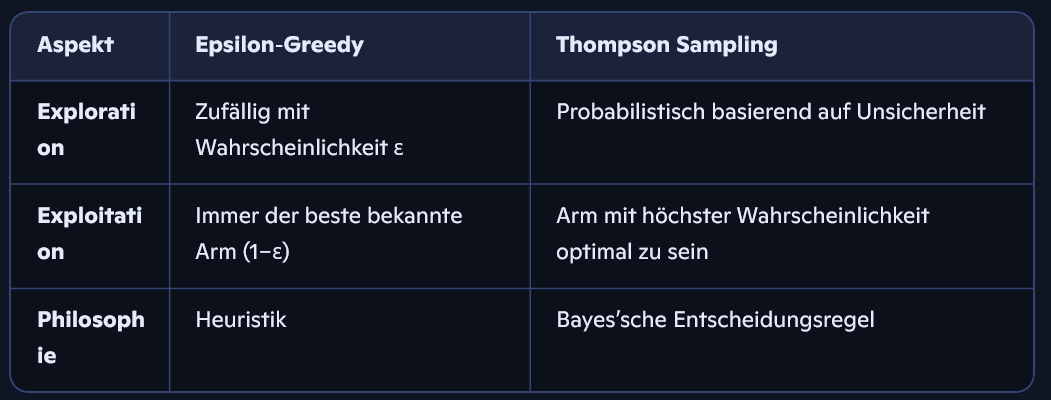


## Funktionsweise

### Epsilon‑Greedy
- Schätzt für jeden Arm einen Mittelwert Q(a).
- Mit Wahrscheinlichkeit 1-\varepsilon : wähle den besten Arm.
- Mit Wahrscheinlichkeit \varepsilon : wähle einen zufälligen Arm.
- Exploration ist blind: unabhängig davon, wie unsicher oder sicher die Schätzungen sind.
Vorteile
- Extrem einfach.
- Wenig Rechenaufwand.
- Gut für schnelle Baselines.
Nachteile
- Exploration ist ungerichtet.
- Fester ε‑Wert ist suboptimal; ε‑Decay hilft, aber bleibt heuristisch.
- Schlechtere Regret‑Bounds als moderne Methoden.

🔵 1. Schätzung des Aktionswerts
Für jeden Arm a:
$$
Q_t(a)=\frac{1}{N_t(a)}\sum _{i=1}^{N_t(a)}R_i(a)
$$

(Alternativ inkrementell:)
$$Q_{t+1}(a)=Q_t(a)+\alpha \left( R_t-Q_t(a)\right) $$

🔵 2. Aktionswahlregel
Mit Wahrscheinlichkeit:
$$
\pi (a)=\left\{ \, \begin{array}{ll}\textstyle 1-\varepsilon +\frac{\varepsilon }{K},&\textstyle \mathrm{falls\  }a=\arg \max _bQ_t(b)\\ \textstyle \frac{\varepsilon }{K},&\textstyle \mathrm{sonst}\end{array}\right. 
$$ 

- $$K: Anzahl  der  Arme
$$
- $$\varepsilon : Explorationsrate
$$

### Thompson Sampling
- Modelliert jeden Arm als Wahrscheinlichkeitsverteilung (z. B. Beta‑Verteilung bei Bernoulli‑Rewards).
- Zieht für jeden Arm eine Stichprobe aus dem Posterior.
- Wählt den Arm mit dem höchsten Sample.
- Exploration entsteht automatisch durch Unsicherheit in der Verteilung.
Vorteile
- Exploration ist zielgerichtet: unsichere Arme werden häufiger ausprobiert.
- Sehr gute empirische Performance.
- Starke theoretische Regret‑Bounds.
- Funktioniert auch bei nichtstationären oder komplexeren Reward‑Verteilungen.
Nachteile
- Etwas mehr Rechenaufwand.
- Erfordert ein probabilistisches Modell (Posterior‑Updates).

🔵 Regret‑Vergleich (intuitiv)
- Epsilon‑Greedy: $$O(\frac{K}{\varepsilon }\log T)$$ bei gutem Decay, aber praktisch oft schlechter.
- Thompson Sampling: Nahe am optimalen Bayes‑Regret; in vielen Settings empirisch State‑of‑the‑Art.

🔵 Wann welche Methode?
Epsilon‑Greedy ist sinnvoll, wenn:
- du eine extrem einfache Lösung brauchst,
- Rechenkosten minimal sein sollen,
- du eine schnelle Baseline für Experimente willst.
Thompson Sampling ist sinnvoll, wenn:
- du beste Performance willst,
- Exploration intelligent sein soll,
- du Bayes’sche Modelle ohnehin nutzt,
- du realistische, unsichere Umgebungen modellierst.

🔵 Kurzfazit
Epsilon‑Greedy ist simpel, aber grob.
Thompson Sampling ist eleganter, adaptiver und in der Praxis fast immer überlegen.
